In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import itertools
import random
import pandas as pd
import matplotlib 
import math
from functools import reduce


matplotlib.rcParams['figure.figsize'] = (16, 16)

In [2]:
params = [
            {"pi": 0.5, "theta": [0.1, 0.6, 0.3]},
            {"pi": 0.5, "theta": [0.3, 0.2, 0.5]},
        ]

In [3]:
total_toss = 50
num_cluster = len(params)
total_experiment = 500

In [4]:
def coin_toss(prob, total_toss):
    result = []

    for i in range(total_toss):
        result.append(np.random.choice(len(prob), 1, p=prob)[0])
    return result

In [5]:
X = []
Z = []

for i in range(total_experiment):
    coin_type = np.random.choice(len(params), 1, p=[params[0]["pi"], params[1]["pi"]])[0]
    Z.append(coin_type)
    
    toss = coin_toss(params[coin_type]["theta"], total_toss)
    X.append(toss)

In [6]:
random_Z = np.random.choice(len(params), total_experiment, p=[1/num_cluster for i in range(num_cluster)])

In [7]:
beta = [1, 1, 1]

In [8]:
def test(xi, cluster, i):
    xi_counts = Counter(xi)
    xi_sum = len(xi)
    
    cluster_counts = Counter(cluster)
    C = len(cluster)
    B = sum(beta)
    
    b = beta[i]
#     cluster_counts[i] = 10 if cluster_counts[i] == 0 else cluster_counts[i] 
    v = cluster_counts[i] + b
    
    C = C + B - 1 
    
    return v/C

In [9]:
A = 0.1

In [10]:
def calc_prob(xi, random_Z, X):
    prob = []
    z_count = Counter(random_Z)
    
    clusters = {}
    
    for i in range(num_cluster):
        clusters[i] = []

    for i, cx in enumerate(X):
        if cx == xi:
            continue
        clusters[random_Z[i]].extend(cx)
        
    for i in range(num_cluster):
        prob_k = test(xi, clusters[i], i)
        prob.append(((z_count[i] + A/num_cluster)/(total_experiment + num_cluster - 1)) * prob_k) 
        
    return prob

In [11]:
total_data_likelihood = []

for j in range(10):
    data_likelihood = []
    for i in range(len(X)):
        xi = X[i]
        final_prob = calc_prob(xi, random_Z, X)
        
        total_prob = np.sum(final_prob)
        prob = [p/total_prob for p in final_prob]
        random_Z[i] = np.random.choice(num_cluster, 1, p=prob)[0]
        print(prob, random_Z[i])
        
        data_likelihood.append(np.log(np.sum(final_prob)))
    total_data_likelihood.append(np.sum(data_likelihood))

[0.35092960532076994, 0.6490703946792301] 1
[0.35092960532076994, 0.6490703946792301] 1
[0.35086662196777574, 0.6491333780322243] 1
[0.34909418156278765, 0.6509058184372125] 1
[0.34833020513235285, 0.6516697948676472] 1
[0.34736432062199946, 0.6526356793780006] 1
[0.3445685824137379, 0.6554314175862621] 1
[0.3454223534044123, 0.6545776465955877] 1
[0.3432902883571, 0.6567097116429] 0
[0.3445906314608783, 0.6554093685391217] 1
[0.344562530741814, 0.655437469258186] 0
[0.34447357058211003, 0.65552642941789] 0
[0.34571681947381505, 0.654283180526185] 0
[0.34429557779758474, 0.6557044222024152] 0
[0.3458054425387534, 0.6541945574612467] 1
[0.34369151607103704, 0.6563084839289628] 0
[0.3428941149487647, 0.6571058850512351] 1
[0.34183161232338105, 0.658168387676619] 1
[0.3409103378114547, 0.6590896621885453] 1
[0.3419447343499352, 0.6580552656500647] 1
[0.33990344395378436, 0.6600965560462158] 1
[0.3374000079940278, 0.6625999920059723] 0
[0.33837559515109406, 0.6616244048489061] 0
[0.3374776

[0.2523300463113895, 0.7476699536886104] 1
[0.2528810140735483, 0.7471189859264518] 0
[0.2529916451260957, 0.7470083548739044] 1
[0.25211028165811133, 0.7478897183418887] 1
[0.2528810140735483, 0.7471189859264518] 1
[0.25130617454004595, 0.748693825459954] 0
[0.2528810140735483, 0.7471189859264518] 1
[0.2513687404389423, 0.7486312595610577] 1
[0.2514000350722828, 0.7485999649277172] 1
[0.2514509352593901, 0.7485490647406098] 0
[0.25070475311834534, 0.7492952468816546] 1
[0.24901248595040593, 0.7509875140495941] 0
[0.2516988398022511, 0.748301160197749] 1
[0.2490040643510998, 0.7509959356489002] 1
[0.2466731130418288, 0.7533268869581713] 1
[0.2460915708238656, 0.7539084291761344] 1
[0.24395915711469943, 0.7560408428853005] 1
[0.24471803123234673, 0.7552819687676533] 1
[0.2424739295161696, 0.7575260704838304] 0
[0.24421243875256787, 0.7557875612474321] 0
[0.24477176110819976, 0.7552282388918004] 0
[0.24617734017047052, 0.7538226598295295] 0
[0.2479257709851948, 0.7520742290148051] 1
[0.2

[0.17796629483133586, 0.8220337051686641] 0
[0.17933156888787688, 0.8206684311121232] 1
[0.1782197093358151, 0.8217802906641848] 0
[0.17926827339984622, 0.8207317266001538] 1
[0.17967297418770953, 0.8203270258122903] 1
[0.17817115053317867, 0.8218288494668213] 1
[0.17865730287842374, 0.8213426971215763] 1
[0.17680581747836255, 0.8231941825216375] 0
[0.17891245274680495, 0.8210875472531951] 1
[0.17870358258835253, 0.8212964174116475] 1
[0.178308069894536, 0.821691930105464] 1
[0.1787980572234776, 0.8212019427765225] 1
[0.17735890164397528, 0.8226410983560248] 1
[0.17682465686835958, 0.8231753431316404] 1
[0.17535154613006096, 0.824648453869939] 1
[0.17533115597822166, 0.8246688440217783] 1
[0.176200815446071, 0.823799184553929] 1
[0.17482765312255757, 0.8251723468774425] 1
[0.17523287894651954, 0.8247671210534804] 1
[0.17371045004027044, 0.8262895499597296] 1
[0.1721755413928417, 0.8278244586071584] 0
[0.17288004796417558, 0.8271199520358243] 1
[0.17234047853963116, 0.8276595214603688] 

[0.11695814140468572, 0.8830418585953144] 1
[0.11699722100756896, 0.8830027789924311] 1
[0.11675177052302146, 0.8832482294769786] 1
[0.11540345365361446, 0.8845965463463856] 1
[0.11567391553780948, 0.8843260844621906] 0
[0.11598650243971986, 0.88401349756028] 1
[0.11567868314445413, 0.8843213168555459] 1
[0.11435382001927215, 0.8856461799807278] 1
[0.11501080046179689, 0.8849891995382032] 1
[0.11341697766595378, 0.8865830223340463] 1
[0.11402877187235583, 0.8859712281276442] 1
[0.11272591629400809, 0.8872740837059919] 1
[0.11256300975230378, 0.8874369902476962] 1
[0.11255049798039116, 0.8874495020196088] 1
[0.11257552430628925, 0.8874244756937107] 1
[0.11281383066259197, 0.887186169337408] 1
[0.11253798898962372, 0.8874620110103763] 1
[0.11273846709954059, 0.8872615329004594] 1
[0.11304064588662716, 0.8869593541133729] 1
[0.11113618033152907, 0.8888638196684708] 0
[0.11242885821873758, 0.8875711417812625] 1
[0.11118324538167616, 0.8888167546183239] 1
[0.11087585823108827, 0.88912414176

[0.07208266034128484, 0.9279173396587153] 1
[0.07206666610328229, 0.9279333338967177] 1
[0.07122984128276229, 0.9287701587172377] 1
[0.07010717155279238, 0.9298928284472076] 1
[0.07025509963680716, 0.9297449003631928] 1
[0.07026290262001256, 0.9297370973799873] 1
[0.07024729838651582, 0.9297527016134841] 1
[0.07076483294207576, 0.9292351670579242] 1
[0.0694881703785995, 0.9305118296214004] 1
[0.06988300825986445, 0.9301169917401356] 1
[0.0691261421202598, 0.9308738578797403] 1
[0.06787802834389281, 0.9321219716561071] 1
[0.0679975889129008, 0.9320024110870991] 1
[0.06821898612231093, 0.9317810138776892] 1
[0.06649939056293237, 0.9335006094370676] 1
[0.0654877748549046, 0.9345122251450954] 1
[0.06508361676948264, 0.9349163832305174] 1
[0.0639425293373613, 0.9360574706626387] 1
[0.06404090509013667, 0.9359590949098633] 1
[0.0640268328824216, 0.9359731671175784] 1
[0.0640690680709813, 0.9359309319290187] 1
[0.06448030076098389, 0.935519699239016] 1
[0.06320822182205964, 0.9367917781779403

[0.03322093003412902, 0.966779069965871] 1
[0.0333021166535153, 0.9666978833464848] 1
[0.033270300763875736, 0.9667296992361243] 1
[0.0333127354766216, 0.9666872645233785] 1
[0.033210369649209814, 0.9667896303507902] 1
[0.03238709985981255, 0.9676129001401874] 1
[0.03139674911819195, 0.968603250881808] 1
[0.031326841395895255, 0.9686731586041047] 1
[0.03133680914739396, 0.968663190852606] 1
[0.03139341310480856, 0.9686065868951914] 1
[0.031340133140974384, 0.9686598668590256] 1
[0.031340133140974384, 0.9686598668590256] 1
[0.03133016327507862, 0.9686698367249214] 1
[0.031416780097018634, 0.9685832199029814] 1
[0.031410100264753424, 0.9685898997352466] 1
[0.031410100264753424, 0.9685898997352466] 1
[0.031340133140974384, 0.9686598668590256] 1
[0.0318526557218497, 0.9681473442781503] 1
[0.03079809891913076, 0.9692019010808692] 1
[0.030781780266930035, 0.96921821973307] 1
[0.030732927904688127, 0.9692670720953119] 0
[0.03230645931618481, 0.9676935406838152] 1
[0.032316713773013185, 0.9676

[0.02245346254049545, 0.9775465374595046] 1
[0.023001470938149176, 0.9769985290618508] 1
[0.021974329188104443, 0.9780256708118955] 1
[0.02196735516605113, 0.9780326448339488] 1
[0.022016266488301142, 0.9779837335116988] 1
[0.021974329188104443, 0.9780256708118955] 1
[0.022018601032278186, 0.9779813989677217] 1
[0.02195806335305962, 0.9780419366469403] 1
[0.02201159888516622, 0.9779884011148338] 1
[0.022006933260741088, 0.9779930667392589] 1
[0.02195574162789341, 0.9780442583721065] 1
[0.021969679348160274, 0.9780303206518397] 1
[0.02201159888516622, 0.9779884011148338] 1
[0.02195806335305962, 0.9780419366469403] 1
[0.02195806335305962, 0.9780419366469403] 1
[0.021969679348160274, 0.9780303206518397] 1
[0.0215574230181937, 0.9784425769818064] 1
[0.02092184858584062, 0.9790781514141594] 1
[0.0199574116273751, 0.9800425883726249] 1
[0.019902680100593883, 0.9800973198994062] 1
[0.019965858591214, 0.980034141408786] 1
[0.020365008626647516, 0.9796349913733524] 1
[0.01936237547348199, 0.980

[0.012414732065034705, 0.9875852679349653] 1
[0.01238755741373815, 0.9876124425862618] 1
[0.012412138867342945, 0.987587861132657] 1
[0.012403071200474453, 0.9875969287995255] 1
[0.012384975554960483, 0.9876150244450395] 1
[0.012381104784114005, 0.987618895215886] 1
[0.012382394772198926, 0.9876176052278011] 1
[0.012408251101427445, 0.9875917488985725] 1
[0.012388848746843343, 0.9876111512531566] 1
[0.012422518163572255, 0.9875774818364277] 1
[0.012410842674706317, 0.9875891573252936] 1
[0.012390140349205015, 0.987609859650795] 1
[0.012410842674706317, 0.9875891573252936] 1
[0.012384975554960483, 0.9876150244450395] 1
[0.012421219802334562, 0.9875787801976654] 1
[0.012406955720615665, 0.9875930442793843] 1
[0.011743431968369689, 0.9882565680316304] 0
[0.012421219802334562, 0.9875787801976654] 1
[0.012388848746843343, 0.9876111512531566] 1
[0.012384975554960483, 0.9876150244450395] 1
[0.012406955720615665, 0.9875930442793843] 1
[0.012391432220907385, 0.9876085677790926] 1
[0.01240695572

[0.014346391299390287, 0.9856536087006098] 1
[0.014364204001646945, 0.9856357959983532] 1
[0.014364204001646945, 0.9856357959983532] 1
[0.014331581093243359, 0.9856684189067567] 1
[0.01433454068772501, 0.985665459312275] 1
[0.01433898237208889, 0.9856610176279111] 1
[0.014368664090772037, 0.985631335909228] 1
[0.01437312695047509, 0.985626873049525] 1
[0.014361232146833056, 0.985638767853167] 1
[0.014337501504822464, 0.9856624984951776] 1
[0.01437312695047509, 0.985626873049525] 1
[0.01433454068772501, 0.985665459312275] 1
[0.01437312695047509, 0.985626873049525] 1
[0.014331581093243359, 0.9856684189067567] 1
[0.014336020943399419, 0.9856639790566006] 1
[0.014371639022572736, 0.9856283609774273] 1
[0.014330101754246826, 0.9856698982457532] 1
[0.014358261521477358, 0.9856417384785227] 1
[0.014364204001646945, 0.9856357959983532] 1
[0.014370151402703599, 0.9856298485972964] 1
[0.01433898237208889, 0.9856610176279111] 1
[0.01433454068772501, 0.985665459312275] 1
[0.014362717920510026, 0.9

[0.011574785183304957, 0.9884252148166951] 1
[0.011580775726917904, 0.9884192242730822] 1
[0.011555657022911036, 0.988444342977089] 1
[0.011578378765527654, 0.9884216212344724] 1
[0.0115508848570622, 0.9884491151429379] 1
[0.011580775726917904, 0.9884192242730822] 1
[0.011549692431402706, 0.9884503075685973] 1
[0.011555657022911036, 0.988444342977089] 1
[0.011575982796166796, 0.9884240172038332] 1
[0.011573587818219606, 0.9884264121817804] 1
[0.011580775726917904, 0.9884192242730822] 1
[0.011548500251911745, 0.9884514997480883] 1
[0.0115795771221806, 0.9884204228778194] 1
[0.011549692431402706, 0.9884503075685973] 1
[0.012149959106117438, 0.9878500408938826] 1
[0.010938962686753963, 0.989061037313246] 1
[0.010916410214669037, 0.989083589785331] 1
[0.010915285031833935, 0.9890847149681661] 1
[0.01090853880278487, 0.9890914611972151] 1
[0.010916410214669037, 0.989083589785331] 1
[0.010907415241935097, 0.9890925847580648] 1
[0.010944615372202019, 0.989055384627798] 1
[0.010935573877341094

[0.008885414008090745, 0.9911145859919092] 1
[0.008888171189971551, 0.9911118288100284] 1
[0.008887251939238654, 0.9911127480607613] 0
[0.010350776685199433, 0.9896492233148005] 1
[0.010331509279168405, 0.9896684907208316] 1
[0.010355068094369015, 0.989644931905631] 1
[0.01034756046184068, 0.9896524395381593] 1
[0.010355068094369015, 0.989644931905631] 1
[0.010351849203993884, 0.9896481507960061] 1
[0.01032403575668165, 0.9896759642433183] 1
[0.010348632314191872, 0.9896513676858081] 1
[0.011265067812971458, 0.9887349321870286] 1
[0.009425134753693307, 0.9905748652463067] 1
[0.008246512833089742, 0.9917534871669103] 1
[0.00826697786679389, 0.991733022133206] 1
[0.008267832781066693, 0.9917321672189332] 1
[0.00826441418444941, 0.9917355858155505] 1
[0.008248214381789905, 0.9917517856182101] 1
[0.008262705946066703, 0.9917372940539333] 1
[0.008248214381789905, 0.9917517856182101] 1
[0.008267832781066693, 0.9917321672189332] 1
[0.008260144912168093, 0.9917398550878318] 1
[0.00827039858512

[0.005248099574191022, 0.994751900425809] 1
[0.00524917942761079, 0.9947508205723892] 1
[0.0052341018024414585, 0.9947658981975586] 1
[0.005238400849591102, 0.994761599150409] 1
[0.005249719520981487, 0.9947502804790185] 1
[0.005235175902567052, 0.9947648240974329] 1
[0.005250800041216022, 0.994749199958784] 1
[0.005235713117960432, 0.9947642868820396] 1
[0.005248099574191022, 0.994751900425809] 1
[0.005236787879578046, 0.994763212120422] 1
[0.005245941199678395, 0.9947540588003216] 1
[0.0052341018024414585, 0.9947658981975586] 1
[0.005238938727087852, 0.9947610612729122] 1
[0.005237325425870201, 0.9947626745741298] 1
[0.005237325425870201, 0.9947626745741298] 1
[0.005244862678037707, 0.9947551373219623] 1
[0.005245401883418595, 0.9947545981165814] 1
[0.006412324147417332, 0.9935876758525828] 1
[0.004827998749347857, 0.9951720012506522] 1
[0.004815154462803521, 0.9951848455371965] 1
[0.004827503471379748, 0.9951724965286203] 1
[0.00481614005803275, 0.9951838599419672] 1
[0.004814661816

[0.0018579104795248304, 0.9981420895204751] 1
[0.0018561910856251815, 0.9981438089143748] 1
[0.001853522789328087, 0.998146477210672] 1
[0.001852952009309406, 0.9981470479906905] 1
[0.001853522789328087, 0.998146477210672] 1
[0.001852952009309406, 0.9981470479906905] 1
[0.0018527618274142331, 0.9981472381725858] 1
[0.001857719278472824, 0.9981422807215272] 1
[0.001853522789328087, 0.998146477210672] 1
[0.001853522789328087, 0.998146477210672] 1
[0.0018575281167704856, 0.9981424718832295] 1
[0.0018533324902543036, 0.9981466675097457] 1
[0.0018531422302520875, 0.9981468577697479] 1
[0.0018575281167704856, 0.9981424718832295] 1
[0.0018586756774726355, 0.9981413243225273] 1
[0.0018561910856251815, 0.9981438089143748] 1
[0.001853522789328087, 0.998146477210672] 1
[0.0018563819722196544, 0.9981436180277803] 1
[0.001858101719938656, 0.9981418982800614] 1
[0.0018533324902543036, 0.9981466675097457] 1
[0.0018575281167704856, 0.9981424718832295] 1
[0.0018533324902543036, 0.9981466675097457] 1
[0

[0.0005186165082628053, 0.9994813834917372] 1
[0.0005188835875119131, 0.9994811164124882] 1
[0.000518563125402572, 0.9994814368745975] 1
[0.0005174977713015628, 0.9994825022286985] 1
[0.0005186699021150394, 0.999481330097885] 1
[0.0005173914765990628, 0.999482608523401] 1
[0.0005190974490526822, 0.9994809025509473] 1
[0.0005188301496577077, 0.9994811698503423] 1
[0.0005189370363751101, 0.9994810629636249] 1
[0.0005175509350326602, 0.9994824490649674] 1
[0.0005176041096881435, 0.9994823958903118] 1
[0.0005186165082628053, 0.9994813834917372] 1
[0.0005188835875119131, 0.9994811164124882] 1
[0.0005177636992345917, 0.9994822363007654] 1
[0.0005187767228090932, 0.9994812232771909] 1
[0.0005175509350326602, 0.9994824490649674] 1
[0.0005188835875119131, 0.9994811164124882] 1
[0.0005174977713015628, 0.9994825022286985] 1
[0.0005177636992345917, 0.9994822363007654] 1
[0.0005186699021150394, 0.999481330097885] 1
[0.000518563125402572, 0.9994814368745975] 1
[0.0005188835875119131, 0.9994811164124

[0.00012789046573195167, 0.9998721095342681] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012796918170590902, 0.9998720308182941] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.0001278773558168976, 0.9998721226441831] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012815322968172198, 0.9998718467703184] 1
[0.0001278773558168976, 0.9998721226441831] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012815322968172198, 0.9998718467703184] 1
[0.00012821908946687377, 0.9998717809105332] 1
[0.00012810059054721348, 0.9998718994094529] 1
[0.00012791669362784058, 0.9998720833063722] 1
[0.0001278773558168976, 0.9998721226441831] 1
[0.00012791669362784058, 0.9998720833063722] 1
[0.0001278773558168976, 0.9998721226441831] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012820591209499363, 0.999871794087905] 1
[0.0001279166936278

[0.00012782494302333286, 0.9998721750569768] 1
[0.00012824545233875361, 0.9998717545476613] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.00012820591209499363, 0.999871794087905] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.0001278773558168976, 0.9998721226441831] 1
[0.00012812690470795617, 0.9998718730952921] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012791669362784058, 0.9998720833063722] 1
[0.00012816639622557156, 0.9998718336037745] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012785114404843703, 0.9998721488559517] 1
[0.00012791669362784058, 0.9998720833063722] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012783804219337826, 0.9998721619578067] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.00012785114404843703, 0.9998721488559517] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012819273743

[0.00012820591209499363, 0.999871794087905] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.00012794293228361882, 0.9998720570677164] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.00012794293228361882, 0.9998720570677164] 1
[0.00012823226954784857, 0.9998717677304522] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.00012823226954784857, 0.9998717677304522] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012785114404843703, 0.9998721488559517] 1
[0.00012815322968172198, 0.9998718467703184] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.00012789046573195167, 0.9998721095342681] 1
[0.0001278773558168976, 0.9998721226441831] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012820591209499363, 0.999871794087905] 1
[0.00012815322968172198, 0.9998718467703184] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.00012812690470795617, 0.9998718730952921] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.000128205912094

[0.00012820591209499363, 0.999871794087905] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012816639622557156, 0.9998718336037745] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.00012785114404843703, 0.9998721488559517] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012816639622557156, 0.9998718336037745] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012794293228361882, 0.9998720570677164] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.00012783804219337826, 0.9998721619578067] 1
[0.00012823226954784857, 0.9998717677304522] 1
[0.00012820591209499363, 0.999871794087905] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012787735581

[0.00012789046573195167, 0.9998721095342681] 1
[0.00012825863784042476, 0.9998717413621596] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012825863784042476, 0.9998717413621596] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012789046573195167, 0.9998721095342681] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.0001279560556485358, 0.9998720439443516] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012798231045656717, 0.9998720176895435] 1
[0.00012791669362784058, 0.9998720833063722] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.00012812690470795617, 0.9998718730952921] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012821908946687377, 0.9998717809105332] 1
[0.00012791669362784058, 0.9998720833063722] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012787735

[0.00012821908946687377, 0.9998717809105332] 1
[0.00012785114404843703, 0.9998721488559517] 1
[0.00012810059054721348, 0.9998718994094529] 1
[0.00012815322968172198, 0.9998718467703184] 1
[0.00012820591209499363, 0.999871794087905] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012789046573195167, 0.9998721095342681] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012782494302333286, 0.9998721750569768] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012783804219337826, 0.9998721619578067] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012821908946687377, 0.9998717809105332] 1
[0.00012821908946687377, 0.9998717809105332] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.0001278773558168976, 0.9998721226441831] 1
[0.00012816639622557156, 0.9998718336037745] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.000127864248

[0.00012792981161032977, 0.9998720701883897] 1
[0.00012791669362784058, 0.9998720833063722] 1
[0.00012783804219337826, 0.9998721619578067] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012782494302333286, 0.9998721750569768] 1
[0.00012825863784042476, 0.9998717413621596] 1
[0.00012815322968172198, 0.9998718467703184] 1
[0.00012807428719283307, 0.9998719257128073] 1
[0.0001278773558168976, 0.9998721226441831] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012810059054721348, 0.9998718994094529] 1
[0.00012821908946687377, 0.9998717809105332] 1
[0.00012821908946687377, 0.9998717809105332] 1
[0.00012808743751964409, 0.9998719125624804] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012820591209499363, 0.999871794087905] 1
[0.0001279560556485358, 0.9998720439443516] 1
[0.0001279166936

[0.00012792981161032977, 0.9998720701883897] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.00012794293228361882, 0.9998720570677164] 1
[0.00012823226954784857, 0.9998717677304522] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.00012823226954784857, 0.9998717677304522] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012785114404843703, 0.9998721488559517] 1
[0.00012815322968172198, 0.9998718467703184] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.00012789046573195167, 0.9998721095342681] 1
[0.0001278773558168976, 0.9998721226441831] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012820591209499363, 0.999871794087905] 1
[0.00012815322968172198, 0.9998718467703184] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.00012812690470795617, 0.9998718730952921] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.00012820591209499363, 0.999871794087905] 1
[0.00012808743751964409, 0.9998719125624804] 1
[0.00012824545233875361, 0.9998717545476613] 1
[0.000127864248589

[0.00012789046573195167, 0.9998721095342681] 1
[0.00012789046573195167, 0.9998721095342681] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012791669362784058, 0.9998720833063722] 1
[0.00012820591209499363, 0.999871794087905] 1
[0.00012821908946687377, 0.9998717809105332] 1
[0.00012821908946687377, 0.9998717809105332] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012814006584279468, 0.9998718599341573] 1
[0.00012816639622557156, 0.9998718336037745] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012789046573195167, 0.9998721095342681] 1
[0.00012791669362784058, 0.9998720833063722] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012794293228361882, 0.9998720570677164] 1
[0.00012816639622557156, 0.9998718336037745] 1
[0.00012789046573195167, 0.9998721095342681] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.00012810059054721348, 0.9998718994094529] 1
[0.000127929811

[0.00012785114404843703, 0.9998721488559517] 1
[0.00012790357833532365, 0.9998720964216647] 1
[0.00012811374627637336, 0.9998718862537237] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.0001281795654751772, 0.9998718204345249] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012794293228361882, 0.9998720570677164] 1
[0.00012819273743137308, 0.9998718072625687] 1
[0.00012791669362784058, 0.9998720833063722] 1
[0.00012816639622557156, 0.9998718336037745] 1
[0.00012807428719283307, 0.9998719257128073] 1
[0.00012789046573195167, 0.9998721095342681] 1
[0.00012785114404843703, 0.9998721488559517] 1
[0.00012786424858933482, 0.9998721357514108] 1
[0.00012812690470795617, 0.9998718730952921] 1
[0.00012792981161032977, 0.9998720701883897] 1
[0.00012827182605369816, 0.9998717281739463] 1
[0.00012815322968172198, 0.9998718467703184] 1
[0.00012794293228361882, 0.9998720570677164] 1
[0.00012815322968172198, 0.9998718467703184] 1
[0.00012789046

KeyboardInterrupt: 

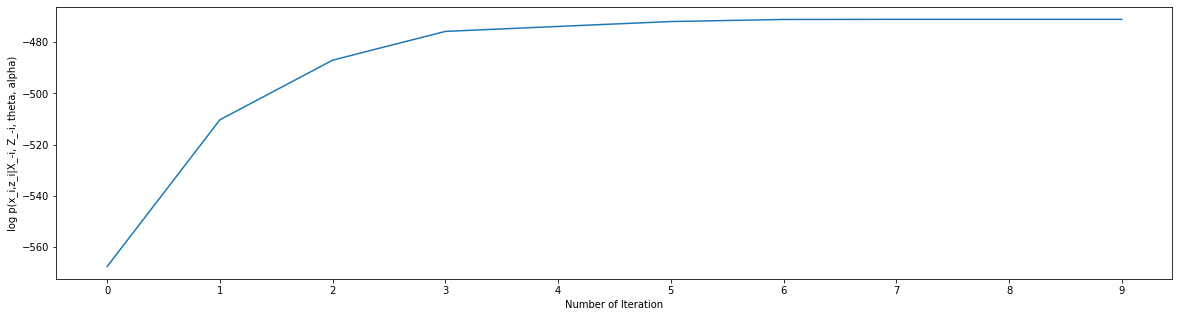

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(total_data_likelihood)
plt.xlabel("Number of Iteration")
plt.ylabel("log p(x_i,z_i|X_-i, Z_-i, theta, alpha)")
plt.xticks([i for i in range(len(total_data_likelihood))])
plt.show()

In [13]:
Counter(random_Z)

Counter({1: 500})

In [14]:
Counter(Z)

Counter({0: 240, 1: 260})

In [15]:
for rz, z in zip(random_Z, Z):
    if rz == z == 0:
        print(rz, z)

In [16]:
count = 0
for rz, z in zip(random_Z, Z):
    if rz == z == 1:
        count+=1

In [17]:
count

260